In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load and Explore the Data

In [3]:
file_path = "C:\Programming\hands-on-projects\day1-individual+household+electric+power+consumption\household_power_consumption.txt"
with open(file_path,"r") as file:
    print(type(file))
    d = []
    for line in file:
        d_strip = line.strip()
        d_split = d_strip.split(";")
        d.append(d_split)
df = pd.DataFrame(d[1:], columns=d[0])

<class '_io.TextIOWrapper'>


In [4]:
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.000
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.000
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.000
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.000
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.000


In [5]:
df.describe()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2075259,2075259,2075259,2075259,2075259,2075259,2075259,2075259,2075259
unique,1442,1440,4187,533,2838,222,89,82,33
top,6/12/2008,17:24:00,?,0.000,?,1.000,0.000,0.000,0.000
freq,1440,1442,25979,481561,25979,172785,1880175,1436830,852092


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype 
---  ------                 ----- 
 0   Date                   object
 1   Time                   object
 2   Global_active_power    object
 3   Global_reactive_power  object
 4   Voltage                object
 5   Global_intensity       object
 6   Sub_metering_1         object
 7   Sub_metering_2         object
 8   Sub_metering_3         object
dtypes: object(9)
memory usage: 142.5+ MB


In [7]:
df.iloc[3]

Date                     16/12/2006
Time                       17:27:00
Global_active_power           5.388
Global_reactive_power         0.502
Voltage                     233.740
Global_intensity             23.000
Sub_metering_1                0.000
Sub_metering_2                1.000
Sub_metering_3               17.000
Name: 3, dtype: object

In [8]:
df.loc[3]

Date                     16/12/2006
Time                       17:27:00
Global_active_power           5.388
Global_reactive_power         0.502
Voltage                     233.740
Global_intensity             23.000
Sub_metering_1                0.000
Sub_metering_2                1.000
Sub_metering_3               17.000
Name: 3, dtype: object

In [9]:
df.replace('?', np.nan, inplace=True)
df['Date'] = df['Date'] + ' ' + df['Time']
numeric_cols = [col for col in df.columns if col not in ['Date', 'Time']]
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y %H:%M:%S')
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')
df = df.drop('Time', axis = 1)

In [10]:
df.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06
mean,1.091615e+00,1.237145e-01,2.408399e+02,4.627759e+00,1.121923e+00,1.298520e+00,6.458447e+00
std,1.057294e+00,1.127220e-01,3.239987e+00,4.444396e+00,6.153031e+00,5.822026e+00,8.437154e+00
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.080000e-01,4.800000e-02,2.389900e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,6.020000e-01,1.000000e-01,2.410100e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,1.528000e+00,1.940000e-01,2.428900e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01


In [11]:
df.head()

,Date,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [12]:
print(df["Date"].min())
print(df["Date"].max())

2006-12-16 17:24:00
2010-11-26 21:02:00


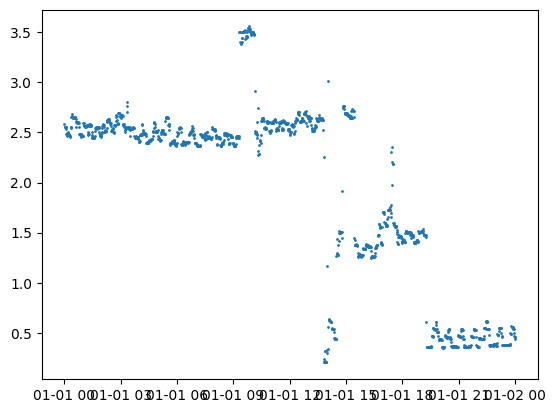

In [13]:
range = (df['Date'] >= '2007-01-01') & (df['Date'] <= '2007-01-02')
plt.scatter(df.loc[range]["Date"], df.loc[range]["Global_active_power"], s=1)

,Date,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
6839,2006-12-21 11:23:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6840,2006-12-21 11:24:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19724,2006-12-30 10:08:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19725,2006-12-30 10:09:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41832,2007-01-14 18:36:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
1990185,2010-09-28 19:09:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990186,2010-09-28 19:10:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990187,2010-09-28 19:11:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990188,2010-09-28 19:12:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


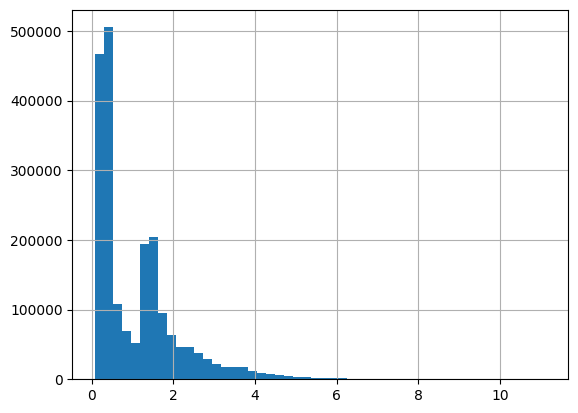

In [14]:
df['Global_active_power'].hist(bins=50)

df.isna().sum()
df[df.isna().any(axis=1)]

# You have 3 main options:

### df.dropna() # Drop rows with missing values

### df.fillna(method='ffill') # Forward-fill

### df.interpolate() # Linear fill (great for time series)

In [15]:
df = df.dropna() # Drop rows with missing values

# Time Series Decomposition

### 🧠 What is decomposition?
Time series data often contains:

Trend – long-term increase or decrease (e.g., rising power use)

Seasonality – repeating cycles (e.g., daily, weekly usage patterns)

Residual – noise or randomness

👉 Decomposition helps separate these components, so we can understand and model them better.

In [16]:
# Step 1: Select a clean subset of data

range = (df['Date'] >= '2007-02-01') & (df['Date'] <= '2007-02-28')
df_subset = df.loc[range]
df_subset.head()

,Date,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
66636,2007-02-01 00:00:00,0.326,0.128,243.15,1.4,0.0,0.0,0.0
66637,2007-02-01 00:01:00,0.326,0.130,243.32,1.4,0.0,0.0,0.0
66638,2007-02-01 00:02:00,0.324,0.132,243.51,1.4,0.0,0.0,0.0
66639,2007-02-01 00:03:00,0.324,0.134,243.90,1.4,0.0,0.0,0.0
66640,2007-02-01 00:04:00,0.322,0.130,243.16,1.4,0.0,0.0,0.0


In [17]:
# Step 2: Resample the data to regular time intervals
# Why? Time series models like ARIMA require uniform spacing between data points. If your original data is minute-level, we might average it to hourly or daily to smooth it.

df_subset['Hour'] = df_subset['Date'].dt.floor('H')
ts = df_subset.groupby('Hour')['Global_active_power'].mean()

C:\Users\sinah\AppData\Local\Temp\ipykernel_2952\3611700666.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset['Hour'] = df_subset['Date'].dt.floor('H')


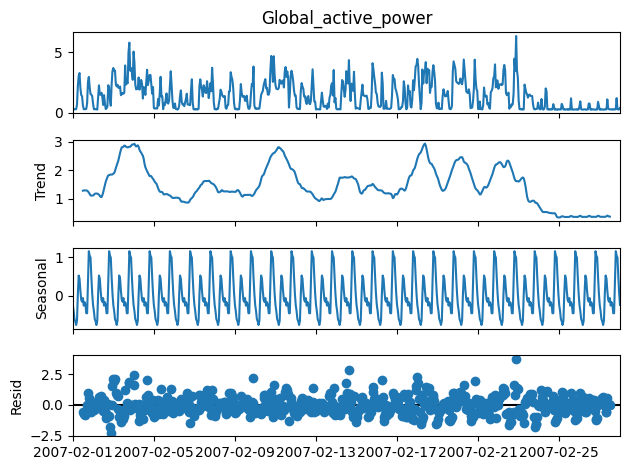

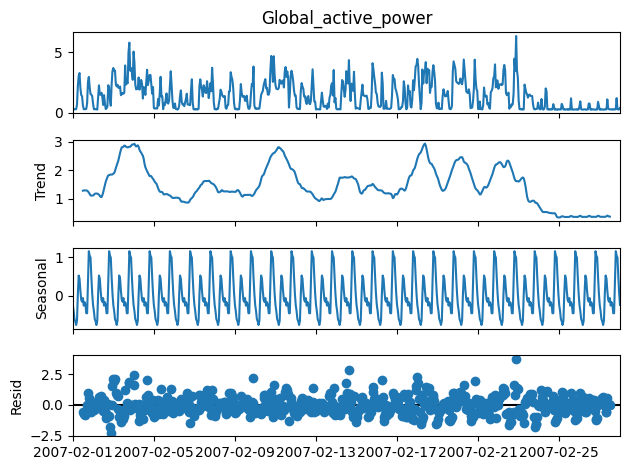

In [18]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(ts, model='additive')
decomposition.plot()

# Prepare for ARIMA Modeling

In [19]:
# 1. Check stationarity:

from statsmodels.tsa.stattools import adfuller

result = adfuller(ts.dropna())
print(f'p-value: {result[1]}')

p-value: 0.004669847680307546


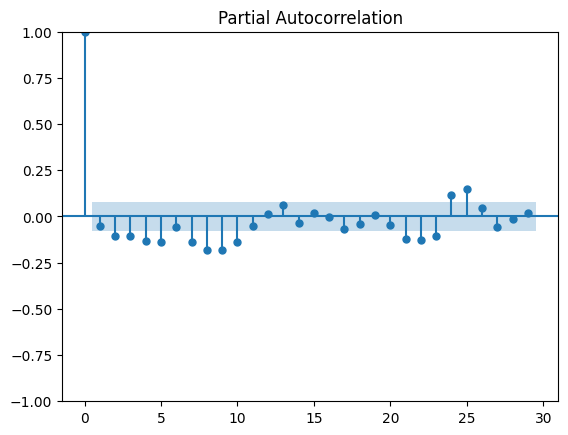

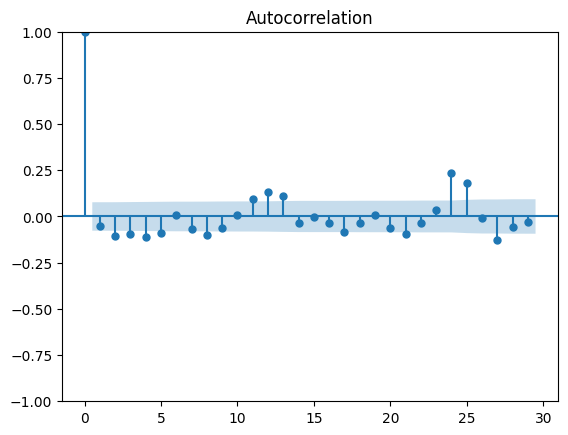

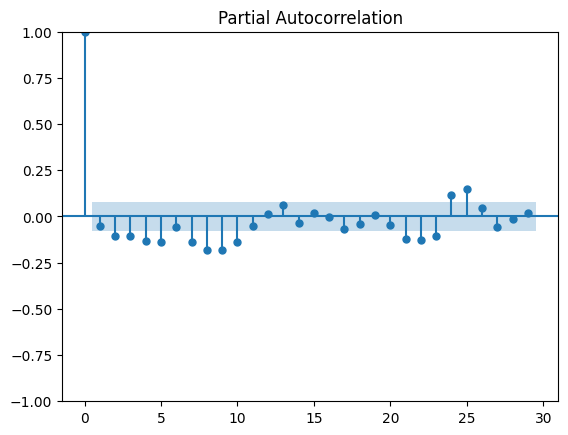

In [20]:
# # 2. ACF & PACF:
# ACF (AutoCorrelation Function) → Helps find q
# → Look for where the plot cuts off

# PACF (Partial AutoCorrelation Function) → Helps find p

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
ts_diff = ts.diff().dropna()
plot_acf(ts_diff)
plot_pacf(ts_diff)

# Fit the ARIMA Model

In [21]:
from statsmodels.tsa.arima.model import ARIMA

# Fit the model
model = ARIMA(ts, order=(1, 1, 1))  # p=1, d=1, q=1
fit = model.fit()

# Review the summary
print(fit.summary())

c:\Users\sinah\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
c:\Users\sinah\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
c:\Users\sinah\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
c:\Users\sinah\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\sinah

                                SARIMAX Results                                
Dep. Variable:     Global_active_power   No. Observations:                  649
Model:                  ARIMA(1, 1, 1)   Log Likelihood                -730.180
Date:                 Sat, 28 Jun 2025   AIC                           1466.361
Time:                         16:59:48   BIC                           1479.783
Sample:                     02-01-2007   HQIC                          1471.568
                          - 02-28-2007                                         
Covariance Type:                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7279      0.029     25.116      0.000       0.671       0.785
ma.L1         -0.9784      0.012    -78.854      0.000      -1.003      -0.954
sigma2         0.5563      0.021     26.558 

In [22]:
forecast = fit.forecast(steps=48)


In [23]:
# Evaluate Forecast with RMSE
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Create train-test split (example: last 48 values as test)
train = ts[:-48]
test = ts[-48:]

# Fit model on training set
model = ARIMA(train, order=(1, 1, 1))
fit = model.fit()

# Forecast same number of steps as test
forecast = fit.forecast(steps=48)

mae = mean_absolute_error(test, forecast)
print(f'MAE: {mae:.3f}')
# Evaluate RMSE
rmse = np.sqrt(mean_squared_error(test, forecast))
print(f'RMSE: {rmse:.3f}')
r = np.sqrt(r2_score(test, forecast))
print(f'R2: {r:.3f}')


c:\Users\sinah\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
c:\Users\sinah\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
c:\Users\sinah\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
c:\Users\sinah\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\sinah

MAE: 1.082
RMSE: 1.115
R2: nan


C:\Users\sinah\AppData\Local\Temp\ipykernel_2952\2843095932.py:20: RuntimeWarning: invalid value encountered in sqrt
  r = np.sqrt(r2_score(test, forecast))


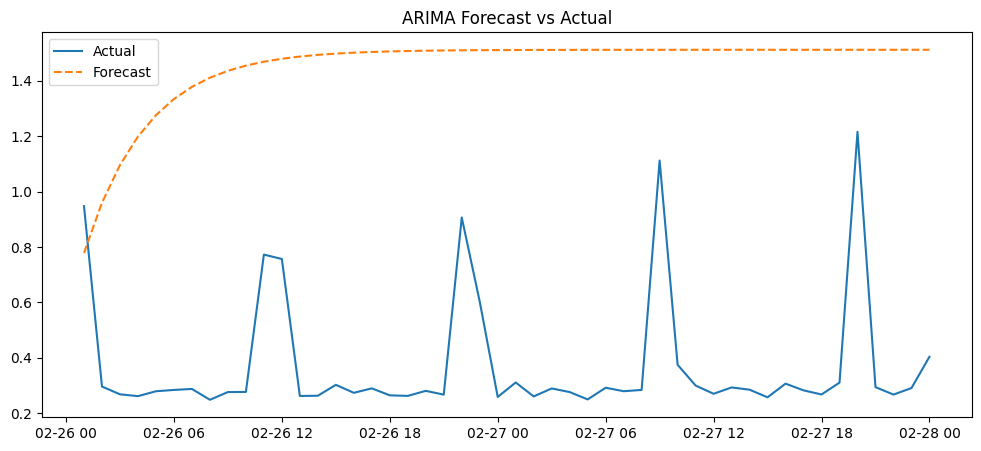

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.plot(test.index, test, label='Actual')
plt.plot(test.index, forecast, label='Forecast', linestyle='--')
plt.legend()
plt.title('ARIMA Forecast vs Actual')
plt.show()

# Fit the Prophet Model

In [25]:
from prophet import Prophet

prophet = ts.reset_index()
prophet.columns = ['ds', 'y']

train = prophet[:-48]
test = prophet[-48:]

model = Prophet()
model.fit(train)

16:59:49 - cmdstanpy - INFO - Chain [1] start processing
16:59:50 - cmdstanpy - INFO - Chain [1] done processing


In [32]:
future = model.make_future_dataframe(periods=24 * 2, freq='H')  # H = hourly
forecast = model.predict(future)

forecasted = forecast[['ds', 'yhat']].set_index('ds').loc[prophet['ds']]
actual = prophet.set_index('ds')['y']

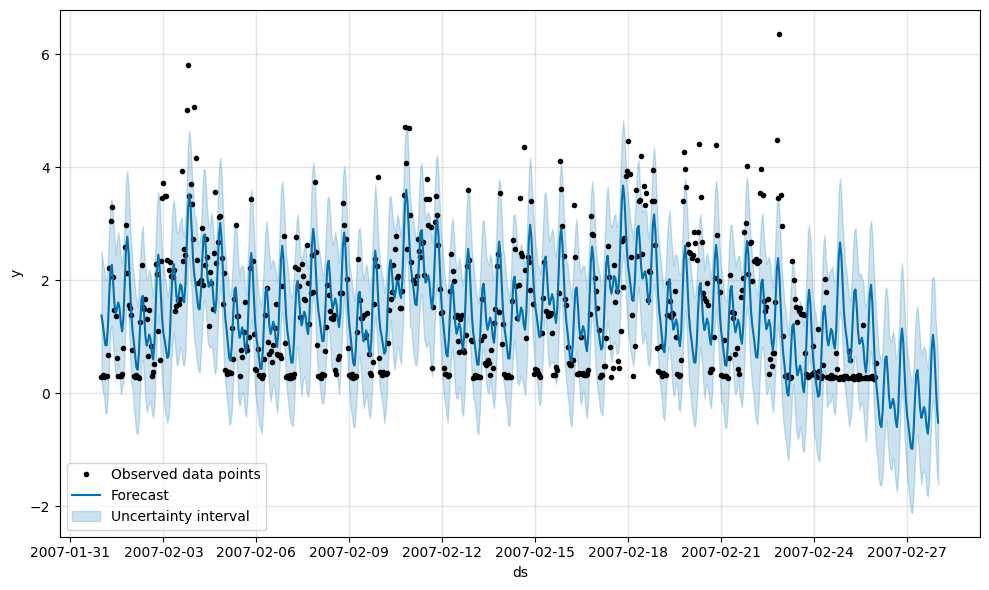

In [33]:
fig1 = model.plot(forecast, include_legend=True)

In [34]:
# Metrics
rmse = np.sqrt(mean_squared_error(actual, forecasted['yhat']))
mae = mean_absolute_error(actual, forecasted['yhat'])
r2 = r2_score(actual, forecasted['yhat'])

print(f"Prophet RMSE: {rmse:.2f}")
print(f"Prophet MAE : {mae:.2f}")
print(f"Prophet R²  : {r2:.2f}")

Prophet RMSE: 0.89
Prophet MAE : 0.69
Prophet R²  : 0.41


## Cross-Validation in Prophet

  0%|          | 0/3 [00:00<?, ?it/s]

17:01:28 - cmdstanpy - INFO - Chain [1] start processing
17:01:28 - cmdstanpy - INFO - Chain [1] done processing
17:01:28 - cmdstanpy - INFO - Chain [1] start processing
17:01:28 - cmdstanpy - INFO - Chain [1] done processing
17:01:28 - cmdstanpy - INFO - Chain [1] start processing
17:01:28 - cmdstanpy - INFO - Chain [1] done processing


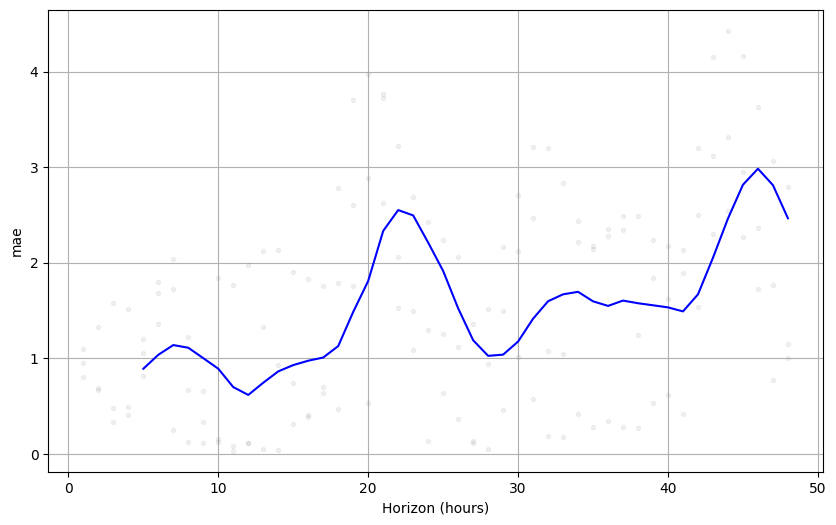

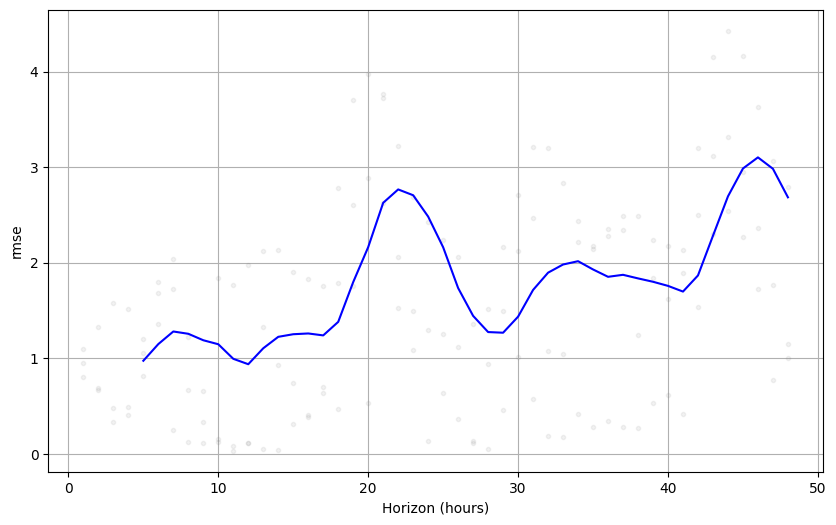

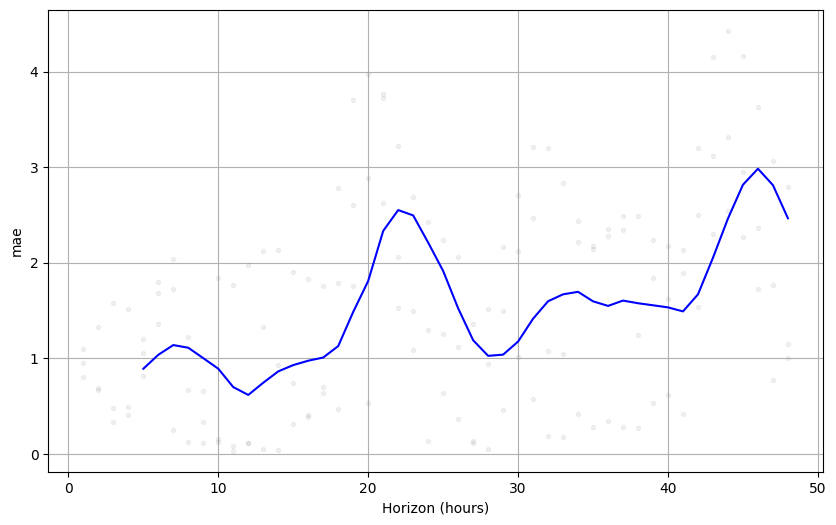

In [35]:
from prophet.diagnostics import cross_validation, performance_metrics
from prophet.plot import plot_cross_validation_metric

df_cv = cross_validation(
    model,
    initial='500 hours',      # size of initial training set (adjust based on your data)
    period='24 hours',         # spacing between cutoff points
    horizon='48 hours'         # forecast horizon at each cutoff
)
df_p = performance_metrics(df_cv)
df_p.head()
plot_cross_validation_metric(df_cv, metric='rmse')
plot_cross_validation_metric(df_cv, metric='mae')


# Tuning Seasonality

In [36]:
model = Prophet(
    daily_seasonality=True,
    weekly_seasonality=True,
    yearly_seasonality=False  # set to True if your data spans years
)

model.add_seasonality(
    name='6hr_cycle',
    period=6,          # 6 hours
    fourier_order=3    # controls complexity; higher = more flexible
)

model.fit(train)
forecast = model.predict(future)

# Metrics
rmse = np.sqrt(mean_squared_error(actual, forecasted['yhat']))
mae = mean_absolute_error(actual, forecasted['yhat'])
r2 = r2_score(actual, forecasted['yhat'])

print(f"Prophet RMSE: {rmse:.2f}")
print(f"Prophet MAE : {mae:.2f}")
print(f"Prophet R²  : {r2:.2f}")

17:01:29 - cmdstanpy - INFO - Chain [1] start processing
17:01:29 - cmdstanpy - INFO - Chain [1] done processing


Prophet RMSE: 0.89
Prophet MAE : 0.69
Prophet R²  : 0.41


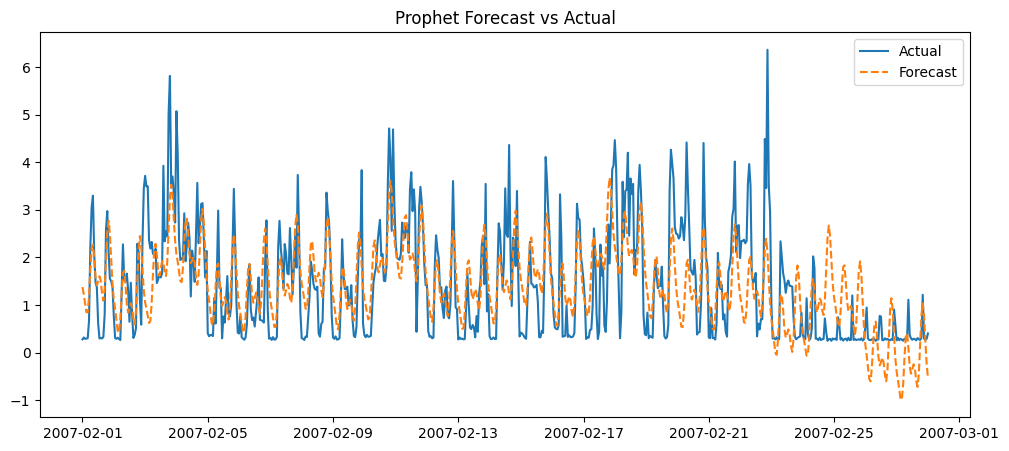

In [37]:
plt.figure(figsize=(12, 5))
plt.plot(prophet['ds'], prophet['y'], label='Actual')
plt.plot(future, forecasted['yhat'], label='Forecast', linestyle='--')
plt.legend()
plt.title('Prophet Forecast vs Actual')
plt.show()